In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("processed_data.csv")
df.head(10)

,term,int_rate,loan_amnt,verification_status,annual_inc,installment,dti,loan_status
0,36.0,10.65,5000.0,0.0,24000.0,162.87,27.65,1.0
1,60.0,15.27,2500.0,1.0,30000.0,59.83,1.00,0.0
2,36.0,15.96,2400.0,0.0,12252.0,84.33,8.72,1.0
3,36.0,13.49,10000.0,1.0,49200.0,339.31,20.00,1.0
4,36.0,7.90,5000.0,1.0,36000.0,156.46,11.20,1.0
5,36.0,18.64,3000.0,1.0,48000.0,109.43,5.35,1.0
6,60.0,21.28,5600.0,1.0,40000.0,152.39,5.55,0.0
7,60.0,12.69,5375.0,0.0,15000.0,121.45,18.08,0.0
8,60.0,14.65,6500.0,0.0,72000.0,153.45,16.12,1.0
9,36.0,12.69,12000.0,1.0,75000.0,402.54,10.78,1.0


In [12]:
df2 = pd.read_csv("normalized_data.csv")
df2.head(10)

,term,int_rate,loan_amnt,verification_status,annual_inc,installment,dti,loan_status
0,0.0,0.225180,0.130435,0.0,0.106603,0.104466,0.691423,1.0
1,1.0,0.420363,0.057971,1.0,0.137061,0.031330,0.025006,0.0
2,0.0,0.449514,0.055072,0.0,0.046966,0.048720,0.218055,1.0
3,0.0,0.345163,0.275362,1.0,0.234527,0.229700,0.500125,1.0
4,0.0,0.108999,0.130435,1.0,0.167519,0.099916,0.280070,1.0
5,0.0,0.562738,0.072464,1.0,0.228436,0.066535,0.133783,1.0
6,1.0,0.674271,0.147826,1.0,0.187825,0.097027,0.138785,0.0
7,1.0,0.311365,0.141304,0.0,0.060916,0.075067,0.452113,0.0
8,1.0,0.394170,0.173913,0.0,0.350268,0.097780,0.403101,1.0
9,0.0,0.311365,0.333333,1.0,0.365497,0.274580,0.269567,1.0


In [18]:
X = df[["loan_amnt", "annual_inc", "dti", "term", "verification_status"]]
y = df[["loan_status"]]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Confusion Matrix:", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accurary Score", accuracy_score(y_test, y_pred))

Confusion Matrix: [[ 1792  9750]
 [ 3671 37944]]
              precision    recall  f1-score   support

         0.0       0.33      0.16      0.21     11542
         1.0       0.80      0.91      0.85     41615

    accuracy                           0.75     53157
   macro avg       0.56      0.53      0.53     53157
weighted avg       0.69      0.75      0.71     53157

Accurary Score 0.7475214929360197


In [32]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=0, shuffle=True)
scores = cross_val_score(clf, X, y, scoring = "precision", cv=cv)
print("Precision: ", scores)

/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/skl

Precision:  [0.79775883 0.80036313 0.80081049 0.79715347 0.79873486 0.7978943
 0.79649601 0.79859707 0.79877296 0.80092325]


In [34]:
features_imp = pd.Series(clf.feature_importances_,index=["int_rate", "loan_amnt", "annual_inc", "dti"]).sort_values(ascending=False)
print(features_imp)

dti           0.339790
int_rate      0.233281
annual_inc    0.219340
loan_amnt     0.207589
dtype: float64


In [17]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Confusion Matrix:", confusion_matrix(y_test,y_pred))
print("Classification Report:", classification_report(y_test,y_pred))
print("Accurary Score", accuracy_score(y_test, y_pred))

Confusion Matrix: [[  881 10766]
 [  711 40799]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.55      0.08      0.13     11647
         1.0       0.79      0.98      0.88     41510

    accuracy                           0.78     53157
   macro avg       0.67      0.53      0.50     53157
weighted avg       0.74      0.78      0.71     53157

Accurary Score 0.7840924055157364


In [23]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:", confusion_matrix(y_test,y_pred))
print("Classification Report:", classification_report(y_test,y_pred))
print("Accurary Score", accuracy_score(y_test, y_pred))


/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion Matrix: [[  909 10738]
 [  726 40784]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.56      0.08      0.14     11647
         1.0       0.79      0.98      0.88     41510

    accuracy                           0.78     53157
   macro avg       0.67      0.53      0.51     53157
weighted avg       0.74      0.78      0.71     53157

Accurary Score 0.7843369640875143


In [25]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.7915841776328558


In [20]:
threshold = 0.9

predicted = clf.predict_proba(X_test)
print(predicted)
predicted[:,0] = (predicted[:,0] < threshold).astype('int')
predicted[:,1] = (predicted[:,1] >= threshold).astype('int')
print(predicted)

print("Confusion Matrix:", confusion_matrix(y_test, predicted[:,1]))
print("Classification Report:", classification_report(y_test, predicted[:,1]))
print("Accurary Score", accuracy_score(y_test, predicted[:,1]))

[[0.32 0.68]
 [0.16 0.84]
 [0.52 0.48]
 ...
 [0.1  0.9 ]
 [0.02 0.98]
 [0.06 0.94]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Confusion Matrix: [[ 9697  1894]
 [27399 14167]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.26      0.84      0.40     11591
         1.0       0.88      0.34      0.49     41566

    accuracy                           0.45     53157
   macro avg       0.57      0.59      0.45     53157
weighted avg       0.75      0.45      0.47     53157

Accurary Score 0.44893428899298304


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 50, 90, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [25, 50, 100]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(scoring = "precision", estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.0min remaining:   18.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished
/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 90, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 100]},
                   random_state=42, scoring='precision', verbose=2)

In [31]:
y_pred = rf_random.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Confusion Matrix:", confusion_matrix(y_test,y_pred))
print("Classification Report:", classification_report(y_test,y_pred))
print("Accurary Score", accuracy_score(y_test, y_pred))

threshold = 0.90

predicted = rf_random.predict_proba(X_test)
predicted[:,0] = (predicted[:,0] < threshold).astype('int')
predicted[:,1] = (predicted[:,1] >= threshold).astype('int')

print("Confusion Matrix:", confusion_matrix(y_test, predicted[:,1]))
print("Classification Report:", classification_report(y_test, predicted[:,1]))
print("Accurary Score", accuracy_score(y_test, predicted[:,1]))


Confusion Matrix: [[ 1833  9758]
 [ 2822 38744]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.39      0.16      0.23     11591
         1.0       0.80      0.93      0.86     41566

    accuracy                           0.76     53157
   macro avg       0.60      0.55      0.54     53157
weighted avg       0.71      0.76      0.72     53157

Accurary Score 0.7633425513102696
[[0.29416667 0.70583333]
 [0.36166667 0.63833333]
 [0.36666667 0.63333333]
 ...
 [0.05916667 0.94083333]
 [0.         1.        ]
 [0.16       0.84      ]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 0.]]
Confusion Matrix: [[ 9807  1784]
 [28000 13566]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.26      0.85      0.40     11591
         1.0       0.88      0.33      0.48     41566

    accuracy                           0.44     53157
   macro avg       0.57      0.59      0.44     53157
weighte

In [34]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [0, 66, 133, 200]}


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

y_pred = rf_random.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Confusion Matrix:", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accurary Score", accuracy_score(y_test, y_pred))

threshold = 0.90

predicted = rf_random.predict_proba(X_test)
print(predicted)
predicted[:,0] = (predicted[:,0] < threshold).astype('int')
predicted[:,1] = (predicted[:,1] >= threshold).astype('int')

print("Confusion Matrix:", confusion_matrix(y_test, predicted[:,1]))
print(classification_report(y_test, predicted[:,1]))
print("Accurary Score", accuracy_score(y_test, predicted[:,1]))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.4min finished
/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Confusion Matrix: [[  713 10878]
 [  581 40985]]
              precision    recall  f1-score   support

         0.0       0.55      0.06      0.11     11591
         1.0       0.79      0.99      0.88     41566

    accuracy                           0.78     53157
   macro avg       0.67      0.52      0.49     53157
weighted avg       0.74      0.78      0.71     53157

Accurary Score 0.7844310250766597
[[0.27401703 0.72598297]
 [0.11649042 0.88350958]
 [0.46169772 0.53830228]
 ...
 [0.14828097 0.85171903]
 [0.1692583  0.8307417 ]
 [0.18576861 0.81423139]]
Confusion Matrix: [[11034   557]
 [34165  7401]]
              precision    recall  f1-score   support

         0.0       0.24      0.95      0.39     11591
         1.0       0.93      0.18      0.30     41566

    accuracy                           0.35     53157
   macro avg       0.59      0.56      0.34     53157
weighted avg       0.78      0.35      0.32     53157

Accurary Score 0.34680286697894913


Failed to import duecredit due to No module named 'duecredit'


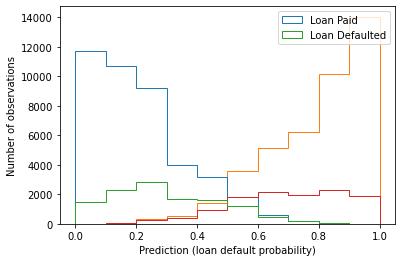

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import forestci as fci
from sklearn.datasets import make_classification

y_pred = clf.predict_proba(X_test)

idx_paid = np.where(y_test == 1)[0]
idx_default = np.where(y_test == 0)[0]

# Histogram predictions without error bars:
fig, ax = plt.subplots(1)
ax.hist(y_pred[idx_paid], histtype='step', label='Loan Paid')
ax.hist(y_pred[idx_default], histtype='step', label='Loan Defaulted')
ax.set_xlabel('Prediction (loan default probability)')
ax.set_ylabel('Number of observations')
plt.legend()

In [24]:
# Calculate the variance
V_unbiased = fci.random_forest_error(clf, X_train,
                                            X_test)

# Plot forest prediction for emails and standard deviation for estimates
# Blue points are spam emails; Green points are non-spam emails
fig, ax = plt.subplots(1)
ax.scatter(y_pred[idx_paid, 1],
           np.sqrt(V_unbiased[idx_paid]),
           label='Loan Paid')

ax.scatter(y_pred[idx_default, 1],
           np.sqrt(V_unbiased[idx_default]),
           label='Loan Defaulted')

ax.set_xlabel('Prediction (loan default probability)')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [47]:
from scipy import stats
y_pred = clf.predict_proba(X_test)

idx_paid = np.where(y_pred >= 0.9)[0]
idx_default = np.where(y_test >= 0.9)[0]

print(y_pred[idx_paid,1])

print(np.std(y_pred[idx_paid,1]))

[0.96 1.   0.94 ... 0.98 0.94 0.98]
0.038987071421494


In [4]:
import pandas as pd

# load data and get selected columns
raw_data = pd.read_csv("lc_loan.csv", error_bad_lines=False)
print("Raw data shape: ", raw_data.shape)
raw_selected_features = raw_data[
    ['term', 'int_rate', 'loan_amnt', 'annual_inc', 'installment', 'dti', 'verification_status', 'loan_status', 'total_pymnt']]
print("Raw selected features shape: ", raw_selected_features.shape)

# drop certain rows
raw_selected_features.dropna(inplace=True)
print("Data shape before drop: ", raw_selected_features.shape)

raw_selected_features = raw_selected_features.loc[((raw_selected_features['loan_status'] == "Fully Paid")
                                                   | (raw_selected_features['loan_status'] == "Charged Off")
                                                   | (raw_selected_features['loan_status'] == "Default")
                                                   | (raw_selected_features['loan_status'] == "Late (31-120 days)"))]
print("Data shape after drop: ", raw_selected_features.shape)
print(raw_selected_features['loan_status'].value_counts())

# pre process data
df_processed = pd.DataFrame(index=range(raw_selected_features.shape[0]),
                            columns=['term', 'int_rate', 'loan_amnt', 'annual_inc', 'installment', 'dti', 'verification_status', 'loan_status', 'total_pymnt'])


def preProcessData():
    for i in range(raw_selected_features.shape[0]):
        if i % 1000 == 0:
            print(str(round((i/raw_selected_features.shape[0])*100, 2)) + "%")

        # good to go features
        df_processed.iat[i, df_processed.columns.get_loc('int_rate')] = raw_selected_features['int_rate'].iloc[i]
        df_processed.iat[i, df_processed.columns.get_loc('loan_amnt')] = raw_selected_features['loan_amnt'].iloc[i]
        df_processed.iat[i, df_processed.columns.get_loc('annual_inc')] = raw_selected_features.iloc[i]['annual_inc']
        df_processed.iat[i, df_processed.columns.get_loc('installment')] = raw_selected_features.iloc[i]['installment']
        df_processed.iat[i, df_processed.columns.get_loc('dti')] = raw_selected_features.iloc[i]['dti']
        df_processed.iat[i, df_processed.columns.get_loc('total_pymnt')] = raw_selected_features.iloc[i]['total_pymnt']

        # features to convert
        df_processed.iat[i, df_processed.columns.get_loc('term')] = float(
            raw_selected_features.iloc[i]['term'].split()[0])
        df_processed.iat[i, df_processed.columns.get_loc('loan_status')] = raw_selected_features.iloc[i]['loan_status']
        if raw_selected_features['verification_status'].iloc[i] == "Source Verified":
            df_processed.iat[i, df_processed.columns.get_loc('verification_status')] = 1.0
        else:
            df_processed.iat[i, df_processed.columns.get_loc('verification_status')] = 0.0
        if raw_selected_features['loan_status'].iloc[i] == "Fully Paid":
            df_processed.iat[i, df_processed.columns.get_loc('loan_status')] = 1.0
        else:
            df_processed.iat[i, df_processed.columns.get_loc('loan_status')] = 0.0

    print(df_processed.shape)
    print(df_processed.head)
    df_processed.to_csv(r'processed_data2.csv', index=False)


preProcessData()

/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Raw data shape:  (887379, 74)
Raw selected features shape:  (887379, 9)


/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Data shape before drop:  (887375, 9)
Data shape after drop:  (265781, 9)
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Default                 1219
Name: loan_status, dtype: int64
0.0%
0.38%
0.75%
1.13%
1.5%
1.88%
2.26%
2.63%
3.01%
3.39%
3.76%
4.14%
4.51%
4.89%
5.27%
5.64%
6.02%
6.4%
6.77%
7.15%
7.52%
7.9%
8.28%
8.65%
9.03%
9.41%
9.78%
10.16%
10.53%
10.91%
11.29%
11.66%
12.04%
12.42%
12.79%
13.17%
13.54%
13.92%
14.3%
14.67%
15.05%
15.43%
15.8%
16.18%
16.55%
16.93%
17.31%
17.68%
18.06%
18.44%
18.81%
19.19%
19.56%
19.94%
20.32%
20.69%
21.07%
21.45%
21.82%
22.2%
22.57%
22.95%
23.33%
23.7%
24.08%
24.46%
24.83%
25.21%
25.58%
25.96%
26.34%
26.71%
27.09%
27.47%
27.84%
28.22%
28.59%
28.97%
29.35%
29.72%
30.1%
30.48%
30.85%
31.23%
31.6%
31.98%
32.36%
32.73%
33.11%
33.49%
33.86%
34.24%
34.61%
34.99%
35.37%
35.74%
36.12%
36.5%
36.87%
37.25%
37.62%
38.0%
38.38%
38.75%
39.13%
39.51%
39.88%
40.26%
40.63%
41.01%
41.39%
41.76%
42.14%
42.52%
42.89%
43.27%
43.64%

In [5]:
df = pd.read_csv("processed_data2.csv")
df.head(10)

,term,int_rate,loan_amnt,annual_inc,installment,dti,verification_status,loan_status,total_pymnt
0,36.0,10.65,5000.0,24000.0,162.87,27.65,0.0,1.0,5861.071414
1,60.0,15.27,2500.0,30000.0,59.83,1.00,1.0,0.0,1008.710000
2,36.0,15.96,2400.0,12252.0,84.33,8.72,0.0,1.0,3003.653644
3,36.0,13.49,10000.0,49200.0,339.31,20.00,1.0,1.0,12226.302212
4,36.0,7.90,5000.0,36000.0,156.46,11.20,1.0,1.0,5631.377753
5,36.0,18.64,3000.0,48000.0,109.43,5.35,1.0,1.0,3938.144334
6,60.0,21.28,5600.0,40000.0,152.39,5.55,1.0,0.0,646.020000
7,60.0,12.69,5375.0,15000.0,121.45,18.08,0.0,0.0,1476.190000
8,60.0,14.65,6500.0,72000.0,153.45,16.12,0.0,1.0,7677.520000
9,36.0,12.69,12000.0,75000.0,402.54,10.78,1.0,1.0,13943.080000


In [6]:
df['R'] = df.apply(lambda row: min(1,row.total_pymnt/row.loan_amnt), axis = 1) 

In [8]:
df.head(10)

,term,int_rate,loan_amnt,annual_inc,installment,dti,verification_status,loan_status,total_pymnt,R
0,36.0,10.65,5000.0,24000.0,162.87,27.65,0.0,1.0,5861.071414,1.000000
1,60.0,15.27,2500.0,30000.0,59.83,1.00,1.0,0.0,1008.710000,0.403484
2,36.0,15.96,2400.0,12252.0,84.33,8.72,0.0,1.0,3003.653644,1.000000
3,36.0,13.49,10000.0,49200.0,339.31,20.00,1.0,1.0,12226.302212,1.000000
4,36.0,7.90,5000.0,36000.0,156.46,11.20,1.0,1.0,5631.377753,1.000000
5,36.0,18.64,3000.0,48000.0,109.43,5.35,1.0,1.0,3938.144334,1.000000
6,60.0,21.28,5600.0,40000.0,152.39,5.55,1.0,0.0,646.020000,0.115361
7,60.0,12.69,5375.0,15000.0,121.45,18.08,0.0,0.0,1476.190000,0.274640
8,60.0,14.65,6500.0,72000.0,153.45,16.12,0.0,1.0,7677.520000,1.000000
9,36.0,12.69,12000.0,75000.0,402.54,10.78,1.0,1.0,13943.080000,1.000000


In [11]:
X = df[["loan_amnt", "annual_inc", "dti", "term", "verification_status"]]
y = df[["R"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Regressor
clf=RandomForestRegressor(n_estimators=50)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/Users/suryamamidyala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


MAE: 0.19002382818703822
MSE: 0.07344952004957706
RMSE: 0.27101571919277495
